# Model2 Regession

ใช้วิธีการ Train model แบบ regession ที่สามารถใช้ค่าต่างๆที่นอกเหนือจากค่า PM2.5 มา predict ได้ซึ่งต่างจากรูปแบบ Time series 

# install pycaret

In [46]:
# %pip install "pycaret[full]"

# load data

อ่านไฟล์ข้อมูล CSV ตั้งแต่ 2024-02-01 ถึง 2024-02-29

In [47]:
import pandas as pd
data = pd.read_csv('air4thai_44t_2024-02-01_2024-02-29.csv')
data

,Unnamed: 0,DATETIMEDATA,PM25,O3,TEMP,RH,WD
0,0,2024-02-01 00:00:00,19.6,1.0,26,82,110
1,1,2024-02-01 01:00:00,19.2,12.0,26,85,108
2,2,2024-02-01 02:00:00,19.0,9.0,26,86,106
3,3,2024-02-01 03:00:00,17.8,1.0,25,88,111
4,4,2024-02-01 04:00:00,13.8,0.0,25,89,116
...,...,...,...,...,...,...,...
691,691,2024-02-29 19:00:00,23.4,NaN,29,70,116
692,692,2024-02-29 20:00:00,21.8,0.0,29,71,151
693,693,2024-02-29 21:00:00,25.1,0.0,28,71,143
694,694,2024-02-29 22:00:00,19.5,1.0,28,71,120


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    696 non-null    int64  
 1   DATETIMEDATA  696 non-null    object 
 2   PM25          683 non-null    float64
 3   O3            572 non-null    float64
 4   TEMP          696 non-null    int64  
 5   RH            696 non-null    int64  
 6   WD            696 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 38.2+ KB


# clean data

In [49]:
del data['Unnamed: 0']


In [50]:
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])

In [51]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATETIMEDATA  696 non-null    datetime64[ns]
 1   PM25          696 non-null    float64       
 2   O3            696 non-null    float64       
 3   TEMP          696 non-null    int64         
 4   RH            696 non-null    int64         
 5   WD            696 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 32.8 KB


In [52]:
result = data

In [53]:
result

,DATETIMEDATA,PM25,O3,TEMP,RH,WD
0,2024-02-01 00:00:00,19.6,1.000000,26,82,110
1,2024-02-01 01:00:00,19.2,12.000000,26,85,108
2,2024-02-01 02:00:00,19.0,9.000000,26,86,106
3,2024-02-01 03:00:00,17.8,1.000000,25,88,111
4,2024-02-01 04:00:00,13.8,0.000000,25,89,116
...,...,...,...,...,...,...
691,2024-02-29 19:00:00,23.4,10.568182,29,70,116
692,2024-02-29 20:00:00,21.8,0.000000,29,71,151
693,2024-02-29 21:00:00,25.1,0.000000,28,71,143
694,2024-02-29 22:00:00,19.5,1.000000,28,71,120


In [54]:
result.dtypes

DATETIMEDATA    datetime64[ns]
PM25                   float64
O3                     float64
TEMP                     int64
RH                       int64
WD                       int64
dtype: object

In [55]:
result.set_index('DATETIMEDATA', drop=True, inplace=True)

In [56]:
result.info()
result.fillna(result.mean(numeric_only=True), inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2024-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    696 non-null    float64
 1   O3      696 non-null    float64
 2   TEMP    696 non-null    int64  
 3   RH      696 non-null    int64  
 4   WD      696 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 32.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2024-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    696 non-null    float64
 1   O3      696 non-null    float64
 2   TEMP    696 non-null    int64  
 3   RH      696 non-null    int64  
 4   WD      696 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 32.6 KB


In [57]:
result.columns

Index(['PM25', 'O3', 'TEMP', 'RH', 'WD'], dtype='object')

In [58]:
all_columns = result[result.columns[0]].count()
all_columns

696

# train_test_split

แบ่งข้อมูล
- train set : ข้อมูลในการ Train model
- test set : ข้อมูลในการ Test model

In [59]:
test = result.sample(int(0.3*all_columns), random_state=36)
train = result.drop(test.index)

In [60]:
train

,PM25,O3,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-02-01 00:00:00,19.6,1.000000,26,82,110
2024-02-01 01:00:00,19.2,12.000000,26,85,108
2024-02-01 02:00:00,19.0,9.000000,26,86,106
2024-02-01 04:00:00,13.8,0.000000,25,89,116
2024-02-01 05:00:00,19.7,0.000000,25,89,114
...,...,...,...,...,...
2024-02-29 18:00:00,18.5,4.000000,30,65,132
2024-02-29 19:00:00,23.4,10.568182,29,70,116
2024-02-29 21:00:00,25.1,0.000000,28,71,143


In [61]:
test

,PM25,O3,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-02-28 02:00:00,12.4,20.000000,28,74,117
2024-02-15 18:00:00,16.1,2.000000,29,66,207
2024-02-05 12:00:00,26.8,1.000000,33,53,130
2024-02-05 04:00:00,27.9,12.000000,25,88,100
2024-02-27 15:00:00,18.1,23.000000,32,51,190
...,...,...,...,...,...
2024-02-21 16:00:00,17.9,28.000000,33,52,174
2024-02-11 19:00:00,18.8,25.000000,28,63,160
2024-02-13 18:00:00,20.6,12.000000,29,65,158


In [62]:
train.shape, test.shape

((488, 5), (208, 5))

# setup

In [63]:
from pycaret.regression import *
s = setup(data = train,test_data = test, target='PM25', session_id=123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(696, 5)"
4,Transformed data shape,"(696, 5)"
5,Transformed train set shape,"(488, 5)"
6,Transformed test set shape,"(208, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


# Compare_model

In [64]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.0654,27.1752,5.0938,-0.2775,0.2639,0.2417,0.0130
br,Bayesian Ridge,4.1259,28.1445,5.1255,-0.2597,0.2758,0.2545,0.0100
lasso,Lasso Regression,4.1262,28.1321,5.1244,-0.2593,0.2751,0.2547,0.1340
llar,Lasso Least Angle Regression,4.1262,28.1321,5.1244,-0.2593,0.2751,0.2547,0.0060
en,Elastic Net,4.1271,28.1213,5.1261,-0.2620,0.2766,0.2546,0.0090
ada,AdaBoost Regressor,4.1306,27.4338,5.0731,-0.2346,0.2636,0.2562,0.0180
ridge,Ridge Regression,4.1687,28.7236,5.1761,-0.2866,0.2816,0.2562,0.0110
lr,Linear Regression,4.1689,28.7267,5.1764,-0.2867,0.2816,0.2562,0.2840
huber,Huber Regressor,4.1789,29.0021,5.2016,-0.2962,0.2831,0.2536,0.0070
lar,Least Angle Regression,4.1909,28.7953,5.1827,-0.2908,0.2846,0.2590,0.0110


# Analyze Model

In [65]:
# evaluate_model(best)

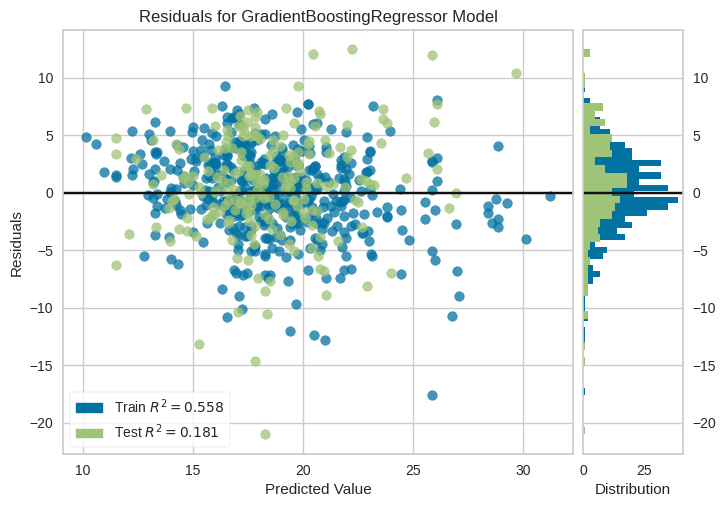

In [66]:
plot_model(best, plot = 'residuals')

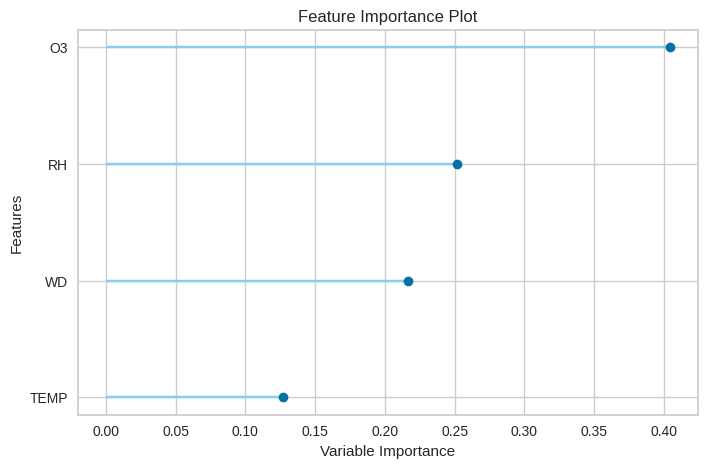

In [67]:
plot_model(best, plot = 'feature')

# Predictions 

In [68]:
pred = predict_model(best)
pred

,O3,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,
2024-02-28 02:00:00,20.000000,28,74,117,12.400000,16.145997
2024-02-15 18:00:00,2.000000,29,66,207,16.100000,19.359852
2024-02-05 12:00:00,1.000000,33,53,130,26.799999,18.289101
2024-02-05 04:00:00,12.000000,25,88,100,27.900000,26.603182
2024-02-27 15:00:00,23.000000,32,51,190,18.100000,14.743480
...,...,...,...,...,...,...
2024-02-21 16:00:00,28.000000,33,52,174,17.900000,19.308434
2024-02-11 19:00:00,25.000000,28,63,160,18.799999,18.463243
2024-02-13 18:00:00,12.000000,29,65,158,20.600000,20.025869


predict ข้อมูลที่ชื่อว่า Data

In [69]:
predictions = predict_model(best, data=data)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.9936,15.6434,3.9552,0.4599,0.2122,0.1838


,O3,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,1.000000,26,82,110,19.600000,21.718979
2024-02-01 01:00:00,12.000000,26,85,108,19.200001,18.682998
2024-02-01 02:00:00,9.000000,26,86,106,19.000000,20.614583
2024-02-01 03:00:00,1.000000,25,88,111,17.799999,23.822831
2024-02-01 04:00:00,0.000000,25,89,116,13.800000,18.701162
...,...,...,...,...,...,...
2024-02-29 19:00:00,10.568182,29,70,116,23.400000,18.589791
2024-02-29 20:00:00,0.000000,29,71,151,21.799999,22.831607
2024-02-29 21:00:00,0.000000,28,71,143,25.100000,22.173951


# Tune model

In [70]:
find_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.0056,25.6618,5.0657,0.2044,0.2454,0.2260
1,5.6064,52.0009,7.2112,-0.1724,0.3006,0.2424
2,4.7848,38.4601,6.2016,-0.0739,0.2582,0.1963
3,2.7379,12.3512,3.5144,-0.2677,0.1653,0.1274
4,3.1525,15.0743,3.8826,-0.2219,0.1994,0.1704
5,2.8363,13.1871,3.6314,-0.2199,0.1981,0.1740
6,3.3074,19.1651,4.3778,0.0609,0.2368,0.2079
7,5.8248,43.1265,6.5671,-0.9349,0.4506,0.5599
8,4.2476,25.5042,5.0502,-0.0342,0.3126,0.3148


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [71]:
pred_tune = predict_model(find_tune, result)
pred_tune

,O3,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,1.000000,26,82,110,19.600000,20.135329
2024-02-01 01:00:00,12.000000,26,85,108,19.200001,19.287638
2024-02-01 02:00:00,9.000000,26,86,106,19.000000,18.846089
2024-02-01 03:00:00,1.000000,25,88,111,17.799999,21.861776
2024-02-01 04:00:00,0.000000,25,89,116,13.800000,21.515595
...,...,...,...,...,...,...
2024-02-29 19:00:00,10.568182,29,70,116,23.400000,18.966461
2024-02-29 20:00:00,0.000000,29,71,151,21.799999,21.762005
2024-02-29 21:00:00,0.000000,28,71,143,25.100000,20.996024


In [72]:
import matplotlib.pyplot as plt

In [73]:
import plotly.express as px
fig = px.line(pred_tune, x=pred_tune.index, y=["PM25", "prediction_label"], template = 'plotly_dark', title='PM2.5 & Prediction_label')


fig.show()

In [74]:
final_model = finalize_model(find_tune)

In [75]:
pred_final = predict_model(final_model, result)
pred_final

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.0531,15.7751,3.9718,0.4553,0.2132,0.1870


,O3,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,1.000000,26,82,110,19.600000,20.308018
2024-02-01 01:00:00,12.000000,26,85,108,19.200001,18.861427
2024-02-01 02:00:00,9.000000,26,86,106,19.000000,19.566868
2024-02-01 03:00:00,1.000000,25,88,111,17.799999,21.669386
2024-02-01 04:00:00,0.000000,25,89,116,13.800000,20.871729
...,...,...,...,...,...,...
2024-02-29 19:00:00,10.568182,29,70,116,23.400000,18.532118
2024-02-29 20:00:00,0.000000,29,71,151,21.799999,21.006494
2024-02-29 21:00:00,0.000000,28,71,143,25.100000,20.679362


In [76]:
import plotly.express as px
fig = px.line(pred_final, x=pred_final.index, y=["PM25", "prediction_label"], template = 'plotly_dark', title='PM2.5 & Prediction_label')


fig.show()

# Predicted Values Over Next 7 Days 

predict ค่า PM2.5 ใน 7 วันข้างหน้า

In [77]:
future_data = pd.read_csv('air4thai_44t_2024-03-01_2024-03-07.csv')
future_data

,Unnamed: 0,DATETIMEDATA,O3,WS,TEMP,RH,WD
0,0,2024-03-01 00:00:00,5.0,1,28,72,111
1,1,2024-03-01 01:00:00,17.0,1,28,74,108
2,2,2024-03-01 02:00:00,18.0,2,28,77,117
3,3,2024-03-01 03:00:00,19.0,1,27,78,112
4,4,2024-03-01 04:00:00,9.0,1,27,78,103
...,...,...,...,...,...,...,...
163,163,2024-03-07 19:00:00,11.0,1,30,64,109
164,164,2024-03-07 20:00:00,7.0,1,30,67,106
165,165,2024-03-07 21:00:00,1.0,1,29,69,104
166,166,2024-03-07 22:00:00,2.0,1,29,74,95


In [78]:
del future_data['Unnamed: 0']
future_data

,DATETIMEDATA,O3,WS,TEMP,RH,WD
0,2024-03-01 00:00:00,5.0,1,28,72,111
1,2024-03-01 01:00:00,17.0,1,28,74,108
2,2024-03-01 02:00:00,18.0,2,28,77,117
3,2024-03-01 03:00:00,19.0,1,27,78,112
4,2024-03-01 04:00:00,9.0,1,27,78,103
...,...,...,...,...,...,...
163,2024-03-07 19:00:00,11.0,1,30,64,109
164,2024-03-07 20:00:00,7.0,1,30,67,106
165,2024-03-07 21:00:00,1.0,1,29,69,104
166,2024-03-07 22:00:00,2.0,1,29,74,95


In [79]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  168 non-null    object 
 1   O3            162 non-null    float64
 2   WS            168 non-null    int64  
 3   TEMP          168 non-null    int64  
 4   RH            168 non-null    int64  
 5   WD            168 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.0+ KB


In [80]:
future_data['DATETIMEDATA'] = pd.to_datetime(future_data['DATETIMEDATA'])

In [81]:
future_data.set_index('DATETIMEDATA',
            drop=True,
            inplace=True)

In [82]:
future_data.fillna(future_data.mean(numeric_only=True), inplace=True)
future_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-03-01 00:00:00 to 2024-03-07 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O3      168 non-null    float64
 1   WS      168 non-null    int64  
 2   TEMP    168 non-null    int64  
 3   RH      168 non-null    int64  
 4   WD      168 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


# Prediction_future

In [83]:
predictions_future = predict_model(final_model, data=future_data)
predictions_future

,O3,WS,TEMP,RH,WD,prediction_label
DATETIMEDATA,,,,,,
2024-03-01 00:00:00,5.0,1,28,72,111,19.806879
2024-03-01 01:00:00,17.0,1,28,74,108,16.912006
2024-03-01 02:00:00,18.0,2,28,77,117,17.341436
2024-03-01 03:00:00,19.0,1,27,78,112,17.950886
2024-03-01 04:00:00,9.0,1,27,78,103,20.069255
...,...,...,...,...,...,...
2024-03-07 19:00:00,11.0,1,30,64,109,18.503373
2024-03-07 20:00:00,7.0,1,30,67,106,21.146847
2024-03-07 21:00:00,1.0,1,29,69,104,22.643604


In [88]:
plot_future = pd.concat([data,predictions_future], axis=0)
fig = px.line(plot_future, x=plot_future.index, y=["PM25", "prediction_label"], template = 'plotly_dark')
fig.show()

# Save_model

In [85]:
save_model(final_model, 'final_model_regression_reality_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['O3', 'TEMP', 'RH', 'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.01, max_depth=7,
                                            max_features='sqrt',
                                            min_impurity_decrease=0.05,
                                            min_samples_leaf=2, n_estimators=140,
                                            random_state=123, subsample=0.35))]),
 'final_model_regression_reality_model.pkl')

# Load_model

In [86]:
loaded_model = load_model('final_model_regression_reality_model')

Transformation Pipeline and Model Successfully Loaded


# Save To_csv

In [87]:
predictions_future.to_csv('predict_regession_2024-02-01_To_2024-02-29')